# <font color=green size=10>CURSO DE ESTATÍSTICA - Alura</font>

***

## Trabalho sobre testes de hipóteses

Utilizando os conhecimentos adquiridos em nosso treinamento realize o teste de hipóteses proposto abaixo.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais testes interessantes que podem ser realizados com o nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas

In [25]:
import pandas as pd
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color='red'>Problema</font>

Você é um pesquisador que estuda o mercado de trabalho brasileiro e resolve estudar as diferenças salariais dos trabalhadores dos estados do Rio de Janeiro e de São Paulo. Durante sua pesquisa você verifica que, aparentemente, os rendimentos dos trabalhadores no estado do Rio de Janeiro são mais baixos que os rendimentos dos trabalhadores no estado de São Paulo. Para confirmar esta conclusão realize um teste de hipótese de comparação de médias em cima de duas amostras de trabalhadores dos dois estados. Siga as seguintes etapas:

- Selecione duas amostras de **500 trabalhadores** para cada um dos dois estados (variável UF) para realizar o teste. Utilize o **parâmetro random_state=101**.
- Considere o **nível de significância de 5%**.
- Teste a hipótese de que a **renda média dos trabalhadores do Rio de Janeiro é menor que a renda média dos trabalhadores de São Paulo**.

---

### Seleção das amostras

In [9]:
trab_rj = df.query('UF == 33').sample(n = 500, random_state = 101).Renda

In [7]:
trab_sp = df.query('UF == 35').sample(n = 500, random_state = 101).Renda

### Dados do problema
Obter média e desvio-padrão para as duas amostras

In [11]:
media_trab_rj = trab_rj.mean()
desvio_trab_rj = trab_rj.std()
print('Média de renda da amostra de trabalhadores do RJ:', media_trab_rj)
print('Desvio padrão da amostra de trabalhadores do RJ:', desvio_trab_rj)

Média de renda da amostra de trabalhadores do RJ: 2240.518
Desvio padrão da amostra de trabalhadores do RJ: 4643.836161867941


In [12]:
media_trab_sp = trab_sp.mean()
desvio_trab_sp = trab_sp.std()
print('Média de renda da amostra de trabalhadores de SP:', media_trab_sp)
print('Desvio padrão da amostra de trabalhadores de SP:', desvio_trab_sp)

Média de renda da amostra de trabalhadores de SP: 2839.352
Desvio padrão da amostra de trabalhadores de SP: 3699.384225434127


---

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

H0 = Renda dos trabalhadores de RJ >= Renda dos trabalhadores de SP

H1 = Renda dos trabalhadores de RJ < Renda dos trabalhadores de SP

---

### **Passo 2** - escolha da distribuição amostral adequada

<AxesSubplot:>

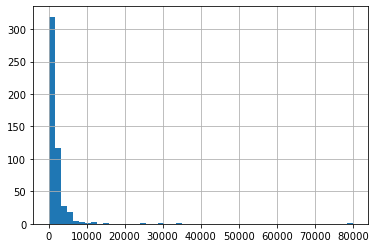

In [17]:
trab_rj.hist(bins=50)

<AxesSubplot:>

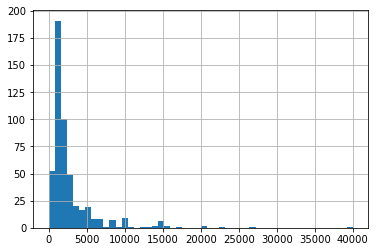

In [18]:
trab_sp.hist(bins=50)

Como possuímos amostras superiores a 30 e não conhecemos o sigma da população, podemos usar a estatística de teste z, com um teste unicaldal inferior.

---

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [50]:
significancia = 0.05

In [61]:
from scipy.stats import norm

z_alpha = norm.ppf(significancia)
z_alpha.round(2)

-1.64

---

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

In [64]:
D_0 = 0

numerador = (media_trab_rj - media_trab_sp) - D_0

denominador = np.sqrt((desvio_trab_rj ** 2 / len(trab_rj)) + (desvio_trab_sp ** 2 / len(trab_sp)))

z = numerador / denominador

print('Valor de z:', z)

Valor de z: -2.255318273608561


---

### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='red'>Critério do valor crítico</font>

In [65]:
if z >= z_alpha:
    print('Aceita H0')
else:
    print('Rejeita H0')

Rejeita H0


### <font color='red'>Critério do valor $p$</font>

In [51]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

### Utilize DescrStatsW

In [52]:
teste_rj = DescrStatsW(trab_rj)
teste_sp = DescrStatsW(trab_sp)

In [53]:
test_DescrStatsW = teste_rj.get_compare(teste_sp)

In [54]:
z, p_valor = test_DescrStatsW.ztest_ind(alternative='smaller', value=0)
print('Estatística de teste:', z)
print('Valor de p:', p_valor)

Estatística de teste: -2.255318273608558
Valor de p: 0.012056679215693396


### Utilize CompareMeans

In [55]:
test_CompareMeans = CompareMeans(teste_rj, teste_sp)

In [56]:
z, p_valor = test_CompareMeans.ztest_ind(alternative='smaller', value=0)
print('Estatística de teste:', z)
print('Valor de p:', p_valor)

Estatística de teste: -2.255318273608558
Valor de p: 0.012056679215693396


In [58]:
if p_valor >= significancia:
    print('Aceita H0')
else:
    print('Rejeita H0')

Rejeita H0


### <font color='green'>Conclusão: Com um nível de confiança de 95%, rejeitamos a hipótese nula (H0) e assumimos a hipótese alternativa (H1) de que os trabalhadores do Rio de Janeiro possuem renda média inferior aos trabalhadores de São Paulo</font>